<div style="text-align: center"> Université de La Réunion - Master Energie - M1
<div style="text-align: center"> S4PH120 | 1 | Simulation Numérique et Multiphysique CiTDTP-1

## Avant-propos

Cours-TD-TP numériques intégrés

- Présentation des **méthodes numériques pour la résolution des équations aux dérivées partielles (EDP)**:

    - *Projet 1* - la méthode des différences finies (rappels),
    - *Projet 2* - la méthode des éléments finis (notions).


- **Développements** codés en langage de programmation **Python**.


### Environnement de travail numérique 

- installation de la plateforme [**Anaconda**](https://www.anaconda.com/products/individual),
- approche interactive avec des éléments de théorie, des **Développements** et des **scripts**,
- fiches au format **.ipynb** (Jupyter Notebook).

**Espace de prise de note ou de prise en main des outils pour tous les supports.**


### Codage des scripts et des fonctions

Faire attention :
- à la nomenclature (nom des variables et des constantes en arguments d’entrée...) et au format des résultats (arguments de sortie, organisation des graphes ...),
- au copier-coller entre tutoriels et plateformes de programmation (caractères spéciaux non reconnus).


### Ressources pédagogiques

- [Moodle](https://moodle-central.univ-reunion.fr),
- [BU Saint-Denis Sciences](https://bu.univ-reunion.fr/bibliotheques/bu-saint-denis-sciences),
- ...

## Utilisation de Python pour résoudre des équations aux dérivées partielles (EDP)

### Introduction

Jupyter Notebook est un environnement de calcul interactif qui permet d'intégrer à la fois du texte, des images, des liens... dans les cellules *Markdown*, et du **code Python exécutable** dans les cellules *Code*.


### Projet 1 - La méthode des différences finies

#### Exercice 1 - Schémas d'Euler explicite et de Runge Kutta d'ordre 4 pour la résolution d'une équation différentielle ordinaire (EDO)

(Q. 10-13)

Soit à résoudre le problème d'absorption suivant :

\begin{array}{lcl}
u'(t)+4 u(t) = 0, \forall t>0 ~~(Eq.~1)~~\\
u(0) = 1\\
\end{array}

en utilisant les schémas d'Euler explicite et de Runge-Kutta d'ordre 4 (*Cf.* Exercice 1, Q. 1-8).


Déterminer l'évolution de l'inconnue $u(t)$ en fonction de $t$ sur l'intervalle $[t_0,t_1]$ pour la condition initiale (CI) $u_0=u(0)=1$.


*Application :* prendre $t_0=0s$, $t_1=3s$ et $N=24$ (rappel : $N$ nombre de sous-intervalles).


*Programmation Python: éléments de syntaxe*


1. Insérer une cellule de type Code (menu *Insert > Insert Cell Below*).


2. Importer les modules Python requis :

- [Numpy](https://numpy.org/doc/stable/) pour la manipulation des tableaux (vecteurs/matrices) de type `array`
- et [Matplotlib](https://matplotlib.org/) pour la visualisation graphique.


3. Déclarer les constantes / paramètres donnés, à savoir $u_0$, $t_0$, $t_1$ et $N$.


4. Créer le vecteur temps $t$ avec la fonction `np.linspace` du module [Numpy](https://numpy.org/doc/stable/). Pour vérifier que le vecteur généré correspond à la consigne (*i.e.* $t$ vecteur de longueur $N$ tel que $t(0)=t_0$ et $t(N-1)=t_1$), utiliser la fonction imprime écran `print` pour afficher le vecteur $t$. Quelle est la taille de $t$? Pour récupérer la longueur de $t$, on pourra utiliser la fonction `len` (ou bien la fonction `np.size` du module [Numpy](https://numpy.org/doc/stable/)).


5. Définir la fonction `f` second membre de l'EDO écrite sous la forme donnée dans l'Eq. 2:
$$u'(t)=f(t,u(t))~~(Eq.~2)~~$$
    et qui apparait dans les schémas numériques d'Euler explicite et Runge Kutta d'ordre 4.


6. Définir la fonction `EulerExp` dont les paramètres d'entrée sont le vecteur temps $t$, le temps final $t_1$ et la condition initiale $u_0$, et qui retourne l'inconnue $u$, solution du problème d'absorption.


    Indication : définir le pas de discrétisation $h$ dans la fonction fonction `EulerExp` à partir des arguments d'entrée $t$ et $t_1$ de la fonction.


7. Représentation graphique :
    - tracer le graphe de $u(t)$ en fonction de $t$,
    - insérer un titre, une légende, des labels pour les axes en utilisant les instructions `title`, `legend` (et l'option `label` en amont dans la fonction `plot`), `xlabel` et `ylabel`,
    - et modifier couleur, style et largeur de ligne, polices de caractères ...

    (*Cf.* sites d'aide en ligne)


8. Superposer au graphe précédent celui de la solution approchée pour $N=6$.


9. **Conclusion : les résultats sont-ils conformes à la théorie ? On superposera aux graphes précédents celui pour la solution théorique donnée par :**
$$u(t)=u_0e^{-4t}~~(Eq.~3)~~$$


    Indication : pour faciliter la comparaison, représenter avec les symboles `x` et `+` les graphes de $u(t)$ donnés par le schéma d'Euler explicite pour $N=6$ et $N=24$ resp., et en trait plein celui pour la solution théorique. On pourra définir la fonction `sol_ex` de paramètres d'entrée $t$ et $u_0$, et qui retourne le vecteur solution exacte.


10. Reprendre les questions 6. à 9. pour le schéma de Runge-Kutta d'ordre 4 (fonction `RKutta4` à définir). 


11. **Conclusion générale : au vu des résultats, lequel des deux schémas semble être le meilleur choix ?**

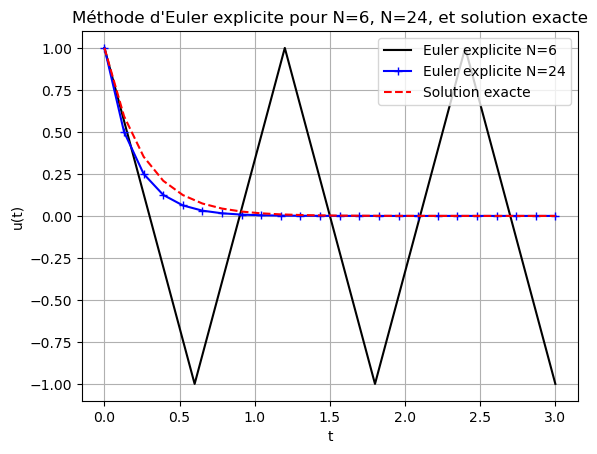

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 3.0  # largeur de l'intervalle d'étude
N6 = 6   # nombre de sous-intervalles pour N=6
N24 = 24  # nombre de sous-intervalles pour N=24
u0 = 1.0  # CI

def f(t, u):
    return -4 * u

# linspace pour N=6 et N=24
t6 = np.linspace(0, t0, N6)
t24 = np.linspace(0, t0, N24)

# Calcul du  pas de temps
h6 = t0 / N6
h24 = t0 / N24

# méthode d'Euler utilisable pour N=6 et N=24
def Euler_exp(t, u0, h, f):
    u = np.zeros(len(t))
    u[0] = u0
    for i in range(0, len(t) - 1):
        u[i + 1] = u[i] + h * f(t[i], u[i])
    return u

ueu6 = Euler_exp(t6, u0, h6, f)
ueu24 = Euler_exp(t24, u0, h24, f)

# calcule de la solution exacte
def exact_solution(t):
    return np.exp(-4 * t)

u_exact = exact_solution(t24)


plt.plot(t6, ueu6, 'k-', label='Euler explicite N=6')
plt.plot(t24, ueu24, 'b-+', label='Euler explicite N=24')
plt.plot(t24, u_exact, 'r--', label='Solution exacte')
plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Méthode d\'Euler explicite pour N=6, N=24, et solution exacte')
plt.grid()
plt.show()


## Shémas de runge kutta

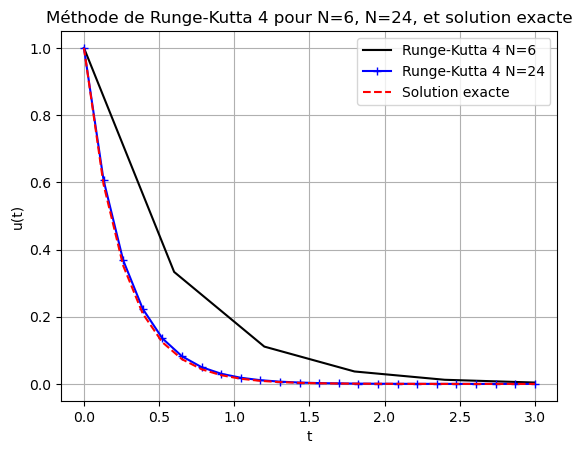

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 3.0  # largeur de l'intervalle d'étude
N6 = 6   # nombre de sous-intervalles pour N=6
N24 = 24  # nombre de sous-intervalles pour N=24
u0 = 1.0  # CI

def f(t, u):
    return -4 * u

# linspace pour N=6 et N=24
t6 = np.linspace(0, t0, N6)
t24 = np.linspace(0, t0, N24)

# Calcule du pas de temps correspondants
h6 = t0 / N6
h24 = t0 / N24

#  méthode de Runge-Kutta d'ordre 4 (RK4) pour N=6 et N=24
def RK4(t, u0, h, f):
    u = np.zeros(len(t))
    u[0] = u0
    for i in range(0, len(t) - 1):
        k1 = h * f(t[i], u[i])
        k2 = h * f(t[i] + h / 2, u[i] + k1 / 2)
        k3 = h * f(t[i] + h / 2, u[i] + k2 / 2)
        k4 = h * f(t[i] + h, u[i] + k3)
        u[i + 1] = u[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return u

urk6 = RK4(t6, u0, h6, f)
urk24 = RK4(t24, u0, h24, f)

# calcule de la solution exacte
def exact_solution(t):
    return np.exp(-4 * t)

u_exact = exact_solution(t24)

# affichage
plt.plot(t6, urk6, 'k-', label='Runge-Kutta 4 N=6')
plt.plot(t24, urk24, 'b-+', label='Runge-Kutta 4 N=24')
plt.plot(t24, u_exact, 'r--', label='Solution exacte')

plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Méthode de Runge-Kutta 4 pour N=6, N=24, et solution exacte')
plt.grid()
plt.show()


*Eléments de correction : figures à reproduire*

![EulerExplicite](Eq_abs_EulerExp.png)
<div style="text-align: center"> Figure 1.</div>

![RungeKutta4](Eq_abs_RK4.png)
<div style="text-align: center"> Figure 2.</div>

La solution avec la methode de runge kutaa est plus precise dans la maniere de calculer  et donne donc un resulatta plus fidele à la realité , elle est donc le meilleure choix
